## Bike Sharing

### Import Relevant Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import statsmodels

### Import Data and Data Understanding

In [2]:
#Read CSV File
data = pd.read_csv("day.csv")

Read Data

In [3]:
# Check 1st five rows to get a glimpse of the data
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Get info of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
data.shape 
#Data has 730 rows and 16 columns

(730, 16)

In [6]:
#Check for null columns
print(data.isnull().all())
#No rows have all null columns

instant       False
dteday        False
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool


In [7]:
#check for unique values in data
data.nunique()

# No columns have only 1 unique values


instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [8]:

# According to the Data Dictionary weathersit should have 4 unique values, but it shows only 3, check those values
data["weathersit"].unique()

# Value 4 : Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog is not available

array([2, 1, 3], dtype=int64)

In [9]:
# check mean, median, max etc.. of the columns
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Cleanup

In [10]:
# When we check the head data we can see that 'cnt' which is the target variable is nothing but casual+registered, hence we can remove these two columns
data.drop(columns={"casual","registered"},axis=1, inplace=True)

In [11]:
# Since we can check the data based on mnth & yr columns we can remove dteday column, here when yr = 0 it's 2018 and when it's 1 it's 2019
data.drop(columns={"dteday"},axis=1,inplace=True)

In [12]:
# The columns instant which is just a redord index can also be removed since it's not relevant for the target variable
data.drop(columns={"instant"},axis=1, inplace=True)

<AxesSubplot:ylabel='hum'>

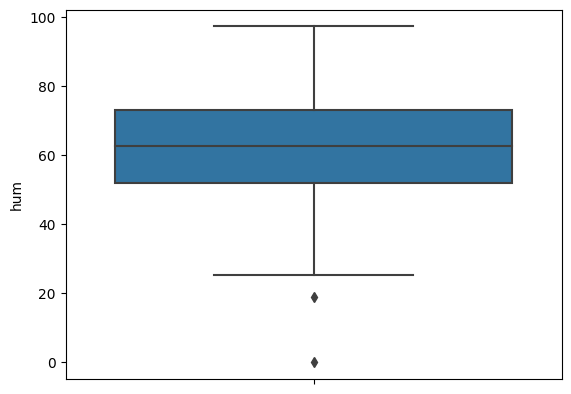

In [13]:
sns.boxplot(data=data,y='hum')

<AxesSubplot:ylabel='temp'>

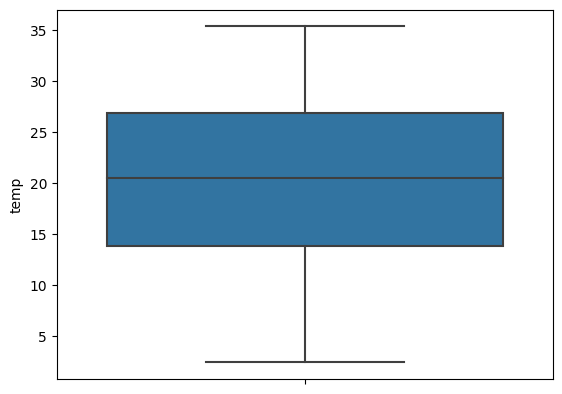

In [14]:
sns.boxplot(data=data,y='temp')

<AxesSubplot:ylabel='windspeed'>

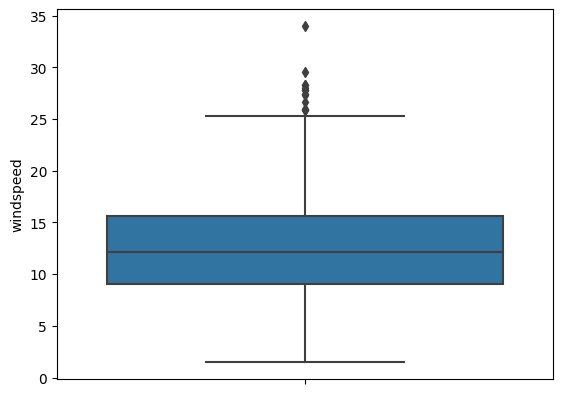

In [15]:
sns.boxplot(data=data, y='windspeed')

In [16]:
# We can see that Humidity and Windspeed has outliers, hence cleaning up the same
data = data.drop(index = data[(data['hum'] < 20)].index)

data = data.drop(index = data[(data['windspeed'] > 25)].index)

In [17]:
data.info()
#number of columns reduced to 11 now

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      712 non-null    int64  
 1   yr          712 non-null    int64  
 2   mnth        712 non-null    int64  
 3   holiday     712 non-null    int64  
 4   weekday     712 non-null    int64  
 5   workingday  712 non-null    int64  
 6   weathersit  712 non-null    int64  
 7   temp        712 non-null    float64
 8   atemp       712 non-null    float64
 9   hum         712 non-null    float64
 10  windspeed   712 non-null    float64
 11  cnt         712 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 72.3 KB


In [18]:
#replacing weathersit based on data dictionary
#         1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
data["weathersit"].replace({1:"Clear/Partly Cloudy",2:"Misty",3:"Light Rain/Thunderstorm",4:"Heavy Rain/Thunderstorm/Snow"},inplace=True)


In [19]:
#replacing season based on data dictionary
#season (1:spring, 2:summer, 3:fall, 4:winter)
data["season"].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)

In [20]:
#replacing year based on data dictionary
#data["yr"].replace({0:2018,1:2019},inplace=True)

In [21]:
#replacing weekday
#data["weekday"].unique()
data['weekday'].replace({1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday",0:"Sunday"},inplace=True)

In [22]:
# replacing months with actual values
data["mnth"].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr' , 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'},inplace=True)

In [23]:
data.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear/Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear/Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,Jan,0,Thursday,1,Clear/Partly Cloudy,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,Jan,0,Friday,1,Misty,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,Jan,0,Saturday,0,Misty,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,Jan,0,Sunday,0,Clear/Partly Cloudy,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,Jan,0,Monday,1,Clear/Partly Cloudy,6.184153,7.54440,48.2917,14.958889,1321


### Exploratory Data Analysis

Exploring Continuous Variables

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

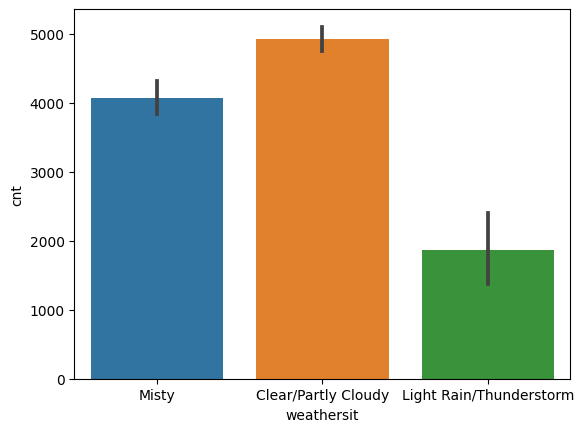

In [24]:
sns.barplot(data=data,x='weathersit',y='cnt')

Observation : The rentals are less when there is rains,thunderstorms etc..

<AxesSubplot:xlabel='season', ylabel='cnt'>

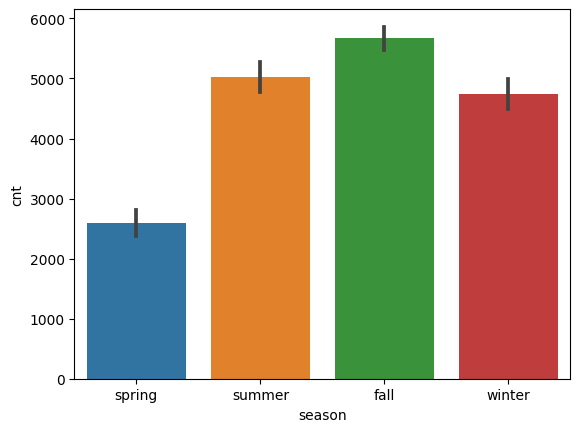

In [25]:
sns.barplot(data=data, x='season' ,y='cnt')

Observation : The rentals are more in Fall season and less in Spring

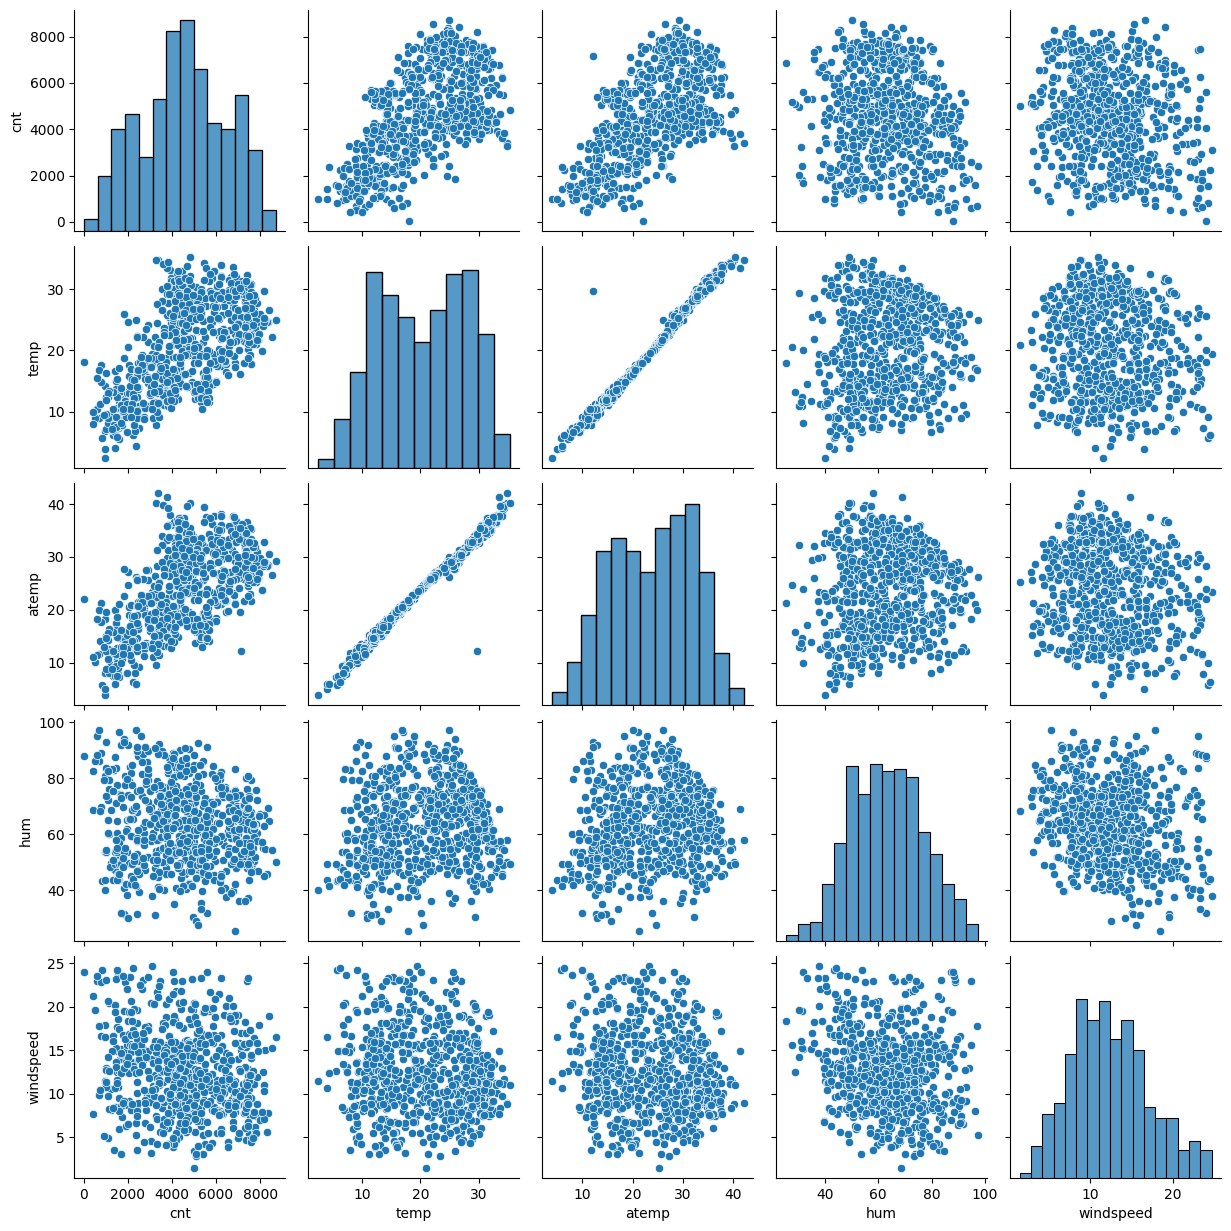

In [26]:
sns.pairplot(data,vars=["cnt","temp","atemp","hum","windspeed"])
plt.show()

The above pair plot shows that atemp(feeling temp in celsius) and temp(temperature in celsius) has a positive correlation

In [27]:
#checking correlation
data.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.009281,0.002243,0.062233,0.062482,-0.115367,-0.031494,0.581504
holiday,0.009281,1.000000,-0.257310,-0.031527,-0.035879,-0.021225,0.019988,-0.073440
workingday,0.002243,-0.257310,1.000000,0.048680,0.046756,0.022930,-0.004693,0.053177
temp,0.062233,-0.031527,0.048680,1.000000,0.991734,0.109541,-0.134704,0.628518
atemp,0.062482,-0.035879,0.046756,0.991734,1.000000,0.121314,-0.159282,0.631825
hum,-0.115367,-0.021225,0.022930,0.109541,0.121314,1.000000,-0.203894,-0.135596
windspeed,-0.031494,0.019988,-0.004693,-0.134704,-0.159282,-0.203894,1.000000,-0.206284
cnt,0.581504,-0.073440,0.053177,0.628518,0.631825,-0.135596,-0.206284,1.000000


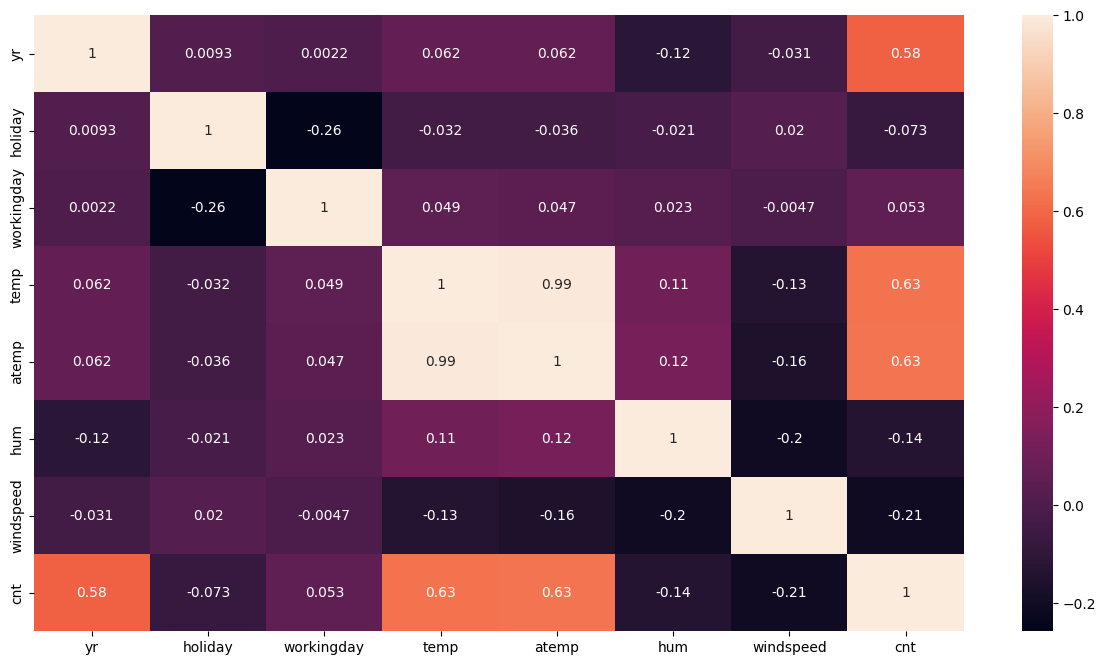

In [28]:
#Heatmap for correlation
plt.figure(figsize=(15,8))
sns.heatmap(data=data.corr(), annot=True)
plt.show()

According to the above heatmap the correlation between atemp and temp is 0.99, hence we can ignore any one of these two columns

In [29]:
#Drop atemp column
data.drop(columns={"atemp"},axis=1,inplace=True)

In [30]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Misty,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Misty,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear/Partly Cloudy,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear/Partly Cloudy,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear/Partly Cloudy,9.305237,43.6957,12.522300,1600


Exploring Categorical variables("season","yr","mnth","holiday","weekday","workingday","weathersit") against cnt column


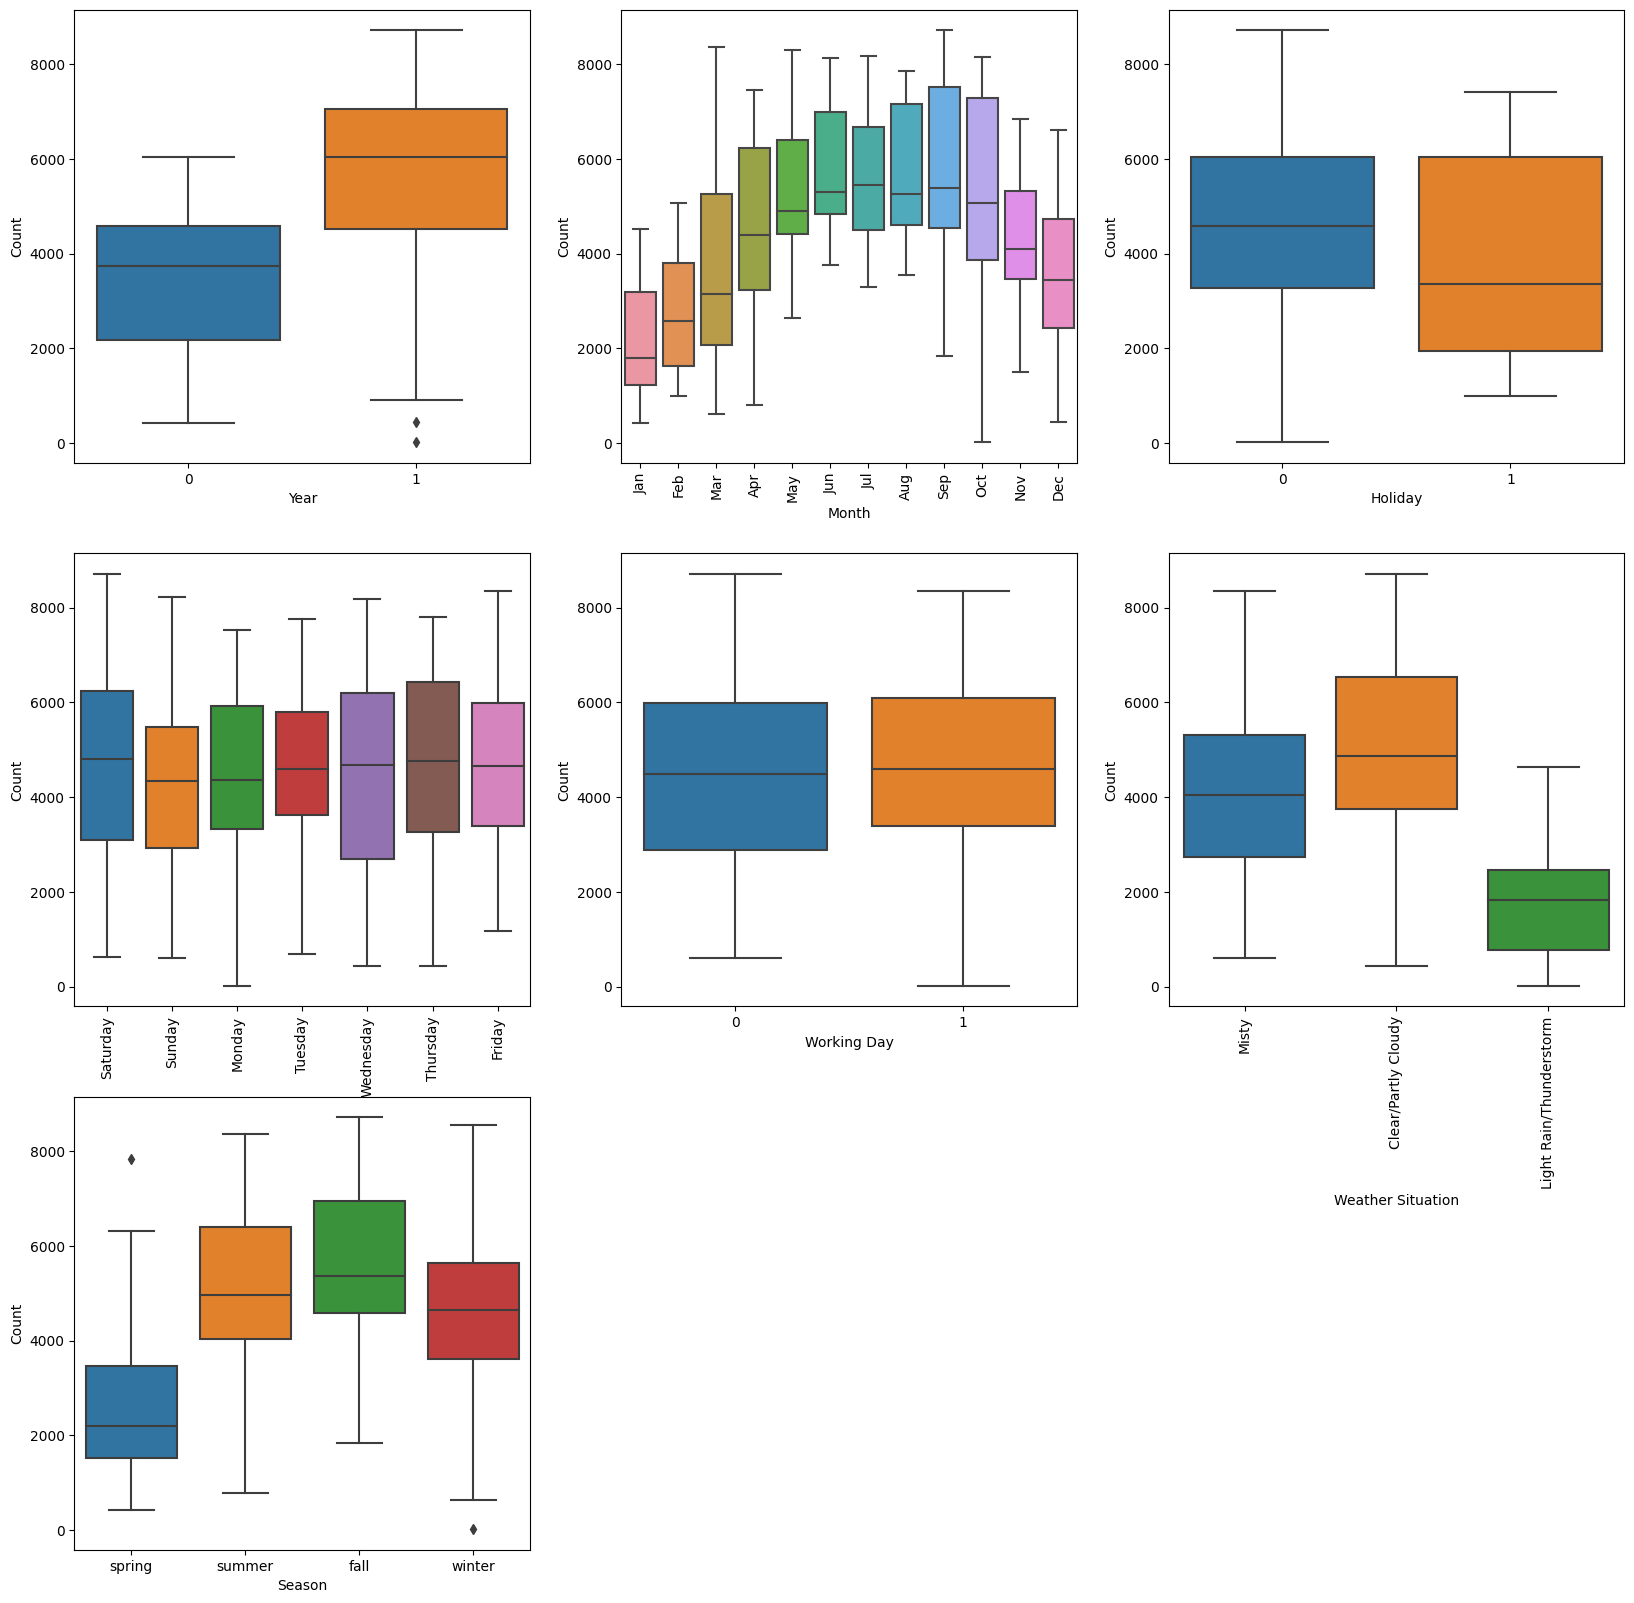

In [31]:
plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
sns.boxplot(data=data,x="yr",y="cnt")
plt.xlabel("Year")
plt.ylabel("Count")

plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.xticks(rotation=90)
plt.xlabel("Month")
plt.ylabel("Count")

plt.subplot(3,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.xlabel("Holiday")
plt.ylabel("Count")

plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.xticks(rotation=90)
plt.xlabel("Weekday")
plt.ylabel("Count")

plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.xlabel("Working Day")
plt.ylabel("Count")

plt.subplot(3,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.xlabel("Weather Situation")
plt.xticks(rotation=90)
plt.ylabel("Count")


plt.subplot(3,3,7)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.xlabel("Season")
plt.ylabel("Count")

plt.show()

Observations : 
- Year : The Demand for bikes has seen significant increase in the year 2019
- Month : The demand is higher in June, August, September and October and least in January
- Holiday : Holidays dodnot make any specific impact
- Season : The demand is high during summer and fall seasons
- Weather Situation : The demand is high when weather is clear/partially cloudy, and is low when it's Raining

### Preparing the data for modeling
- Encoding
   - Convert Binary Categorical Variables to 1 and 0
   - Convert other categorical variables to dummy vars

- Convert Binary Categorical Variables to 1 and 0

In [32]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Misty,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Misty,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear/Partly Cloudy,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear/Partly Cloudy,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear/Partly Cloudy,9.305237,43.6957,12.522300,1600


In [33]:
# There are two binay categorical variables : holiday and working day
print(data["workingday"].unique())
print(data["holiday"].unique())


[0 1]
[0 1]


The two categorical variables holiday and working day are already in binary format, hence there's no need of any conversion

- Convert other categorical variables to dummy variables

In [34]:
# Dropping redundant dummy variables
#i.e the same o/p can be achieved by using n-1 variables instead of n variables
#Concat once dummies are created

seasons = pd.get_dummies(data['season'],drop_first=True)
data = pd.concat([data,seasons],axis=1)

months= pd.get_dummies(data['mnth'],drop_first=True)
data = pd.concat([data,months],axis=1)

weekdays= pd.get_dummies(data['weekday'],drop_first=True)
data = pd.concat([data,weekdays],axis=1)

weathersituations= pd.get_dummies(data['weathersit'],drop_first=True)
data = pd.concat([data,weathersituations],axis=1)

In [35]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain/Thunderstorm,Misty
0,spring,0,Jan,0,Saturday,0,Misty,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,Jan,0,Sunday,0,Misty,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,Jan,0,Monday,1,Clear/Partly Cloudy,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tuesday,1,Clear/Partly Cloudy,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,Wednesday,1,Clear/Partly Cloudy,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [36]:
#Dropping redundant columns for which dummy variables were created
data.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)

In [37]:
data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain/Thunderstorm,Misty
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### Splitting Data into Train and Test Sets

In [38]:
#Splitting data into 70:30 Train:test sets
from sklearn.model_selection import train_test_split


data_train, data_test = train_test_split(data, train_size =0.7,random_state=100)
print(data_train.shape)
print(data_test.shape)

(498, 29)
(214, 29)


#### Rescalling The Features
- The scale of numerical columns are different and needs to be scaled to similar standards or normals so that coefficients obtained are all on the same scale

In [39]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

#Create a list of numerical variables
num_vars = ['temp','hum','windspeed','cnt']

# Fit on data
data_train[num_vars] = scaler.fit_transform(data_train[num_vars])

In [40]:
data_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain/Thunderstorm,Misty
423,1,0,1,0.373860,0.140157,0.494614,0.499425,1,0,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,0,0.245101,0.271097,0.949641,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
503,1,0,0,0.673950,0.230569,0.178102,0.951680,0,1,0,...,0,0,0,1,0,0,0,0,0,0
116,0,0,1,0.698871,0.797978,0.838141,0.442936,0,1,0,...,0,0,0,0,0,0,0,1,0,1
581,1,0,0,0.884740,0.524249,0.775155,0.626093,0,0,0,...,0,0,0,0,1,0,0,0,0,0


#### Modeling

<AxesSubplot:>

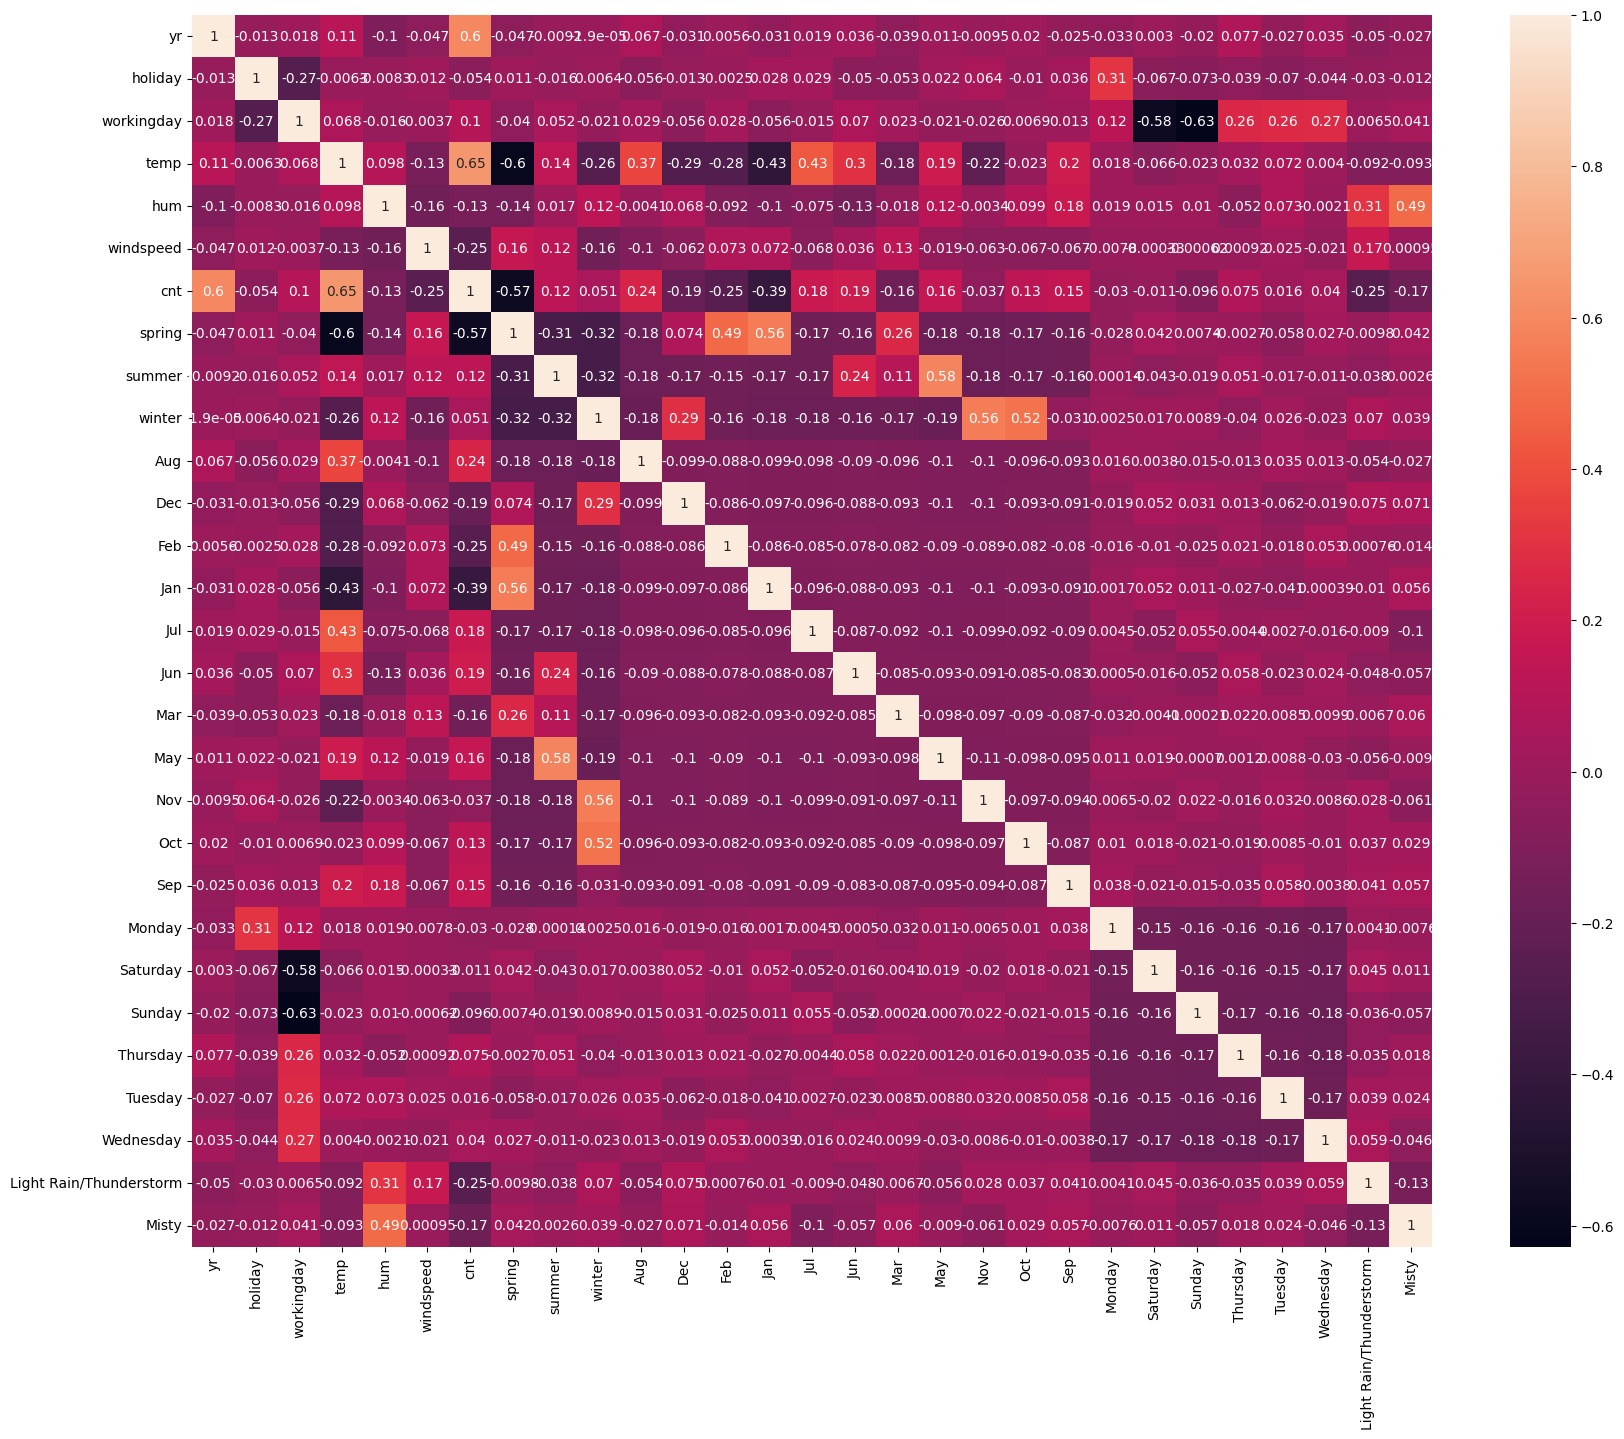

In [41]:
plt.figure(figsize=[20,16])
sns.heatmap(data_train.corr(),annot=True)

In [42]:
data_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain/Thunderstorm,Misty
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,...,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,0.504016,0.030120,0.696787,0.541922,0.499220,0.468410,0.521051,0.238956,0.238956,0.251004,...,0.082329,0.078313,0.134538,0.126506,0.146586,0.144578,0.136546,0.158635,0.028112,0.367470
std,0.500487,0.171091,0.460109,0.229850,0.205010,0.209357,0.223827,0.426875,0.426875,0.434027,...,0.275142,0.268934,0.341573,0.332753,0.354049,0.352029,0.343713,0.365702,0.165460,0.482601
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.345921,0.314743,0.367637,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.537923,0.500556,0.440645,0.527266,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745338,0.647083,0.606998,0.697308,0.000000,0.000000,0.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Divide into X and Y Train Sets

In [43]:
X_train = data_train
y_train = data_train.pop('cnt')

In [44]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Aug,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain/Thunderstorm,Misty
423,1,0,1,0.373860,0.140157,0.494614,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,0,0.245101,0.271097,0.949641,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
503,1,0,0,0.673950,0.230569,0.178102,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
116,0,0,1,0.698871,0.797978,0.838141,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
581,1,0,0,0.884740,0.524249,0.775155,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


Adding All Columns initially to remove one by one

In [45]:

from sklearn.linear_model import LinearRegression
from statsmodels import api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor



Trial 1

In [46]:
#add rfe columns as constants
X_train_sm = sm.add_constant(X_train)

#create first model
lr = sm.OLS(y_train,X_train_sm)

#Fit
lr_model = lr.fit()

#params
lr_model.params

print(lr_model.params)

print(lr_model.summary())

#VIF = 1/(1-R^2)
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

const                      0.238451
yr                         0.227726
holiday                    0.032160
workingday                 0.086662
temp                       0.400539
hum                       -0.120436
windspeed                 -0.106826
spring                    -0.066254
summer                     0.021893
winter                     0.098666
Aug                        0.034510
Dec                       -0.059689
Feb                       -0.039633
Jan                       -0.063818
Jul                       -0.007628
Jun                        0.017289
Mar                        0.001220
May                        0.043075
Nov                       -0.046874
Oct                        0.019336
Sep                        0.078043
Monday                    -0.024585
Saturday                   0.090990
Sunday                     0.028638
Thursday                  -0.003797
Tuesday                   -0.019902
Wednesday                  0.002095
Light Rain/Thunderstorm   -0

,Features,VIF
2,workingday,81.66
22,Sunday,17.26
21,Saturday,14.54
6,spring,10.92
8,winter,10.04
7,summer,8.03
17,Nov,7.54
3,temp,7.13
18,Oct,6.51
13,Jul,6.45


Order for cleaning up model
- High p-value, high VIF - > Drop directly
- High-low:
    -  High p, low VIF -> remove these first
    -  Low p, high VIF -> Remove this after the ones above
- Low p, Low VIF -> Keep it

summer has both high p-value 0.381 and high vif 8.03 , hence dropping and checking if model improves

Trial 2

In [47]:
# 

X_train_mod=X_train.drop(['summer'],axis=1)

#add rfe columns as constants
X_train_sm = sm.add_constant(X_train_mod)

#create first model
lr = sm.OLS(y_train,X_train_sm)

#Fit
lr_model = lr.fit()

#params
lr_model.params

print(lr_model.params)

print(lr_model.summary())

#VIF = 1/(1-R^2)
vif = pd.DataFrame()
vif["Features"] = X_train_mod.columns
vif['VIF'] = [variance_inflation_factor(X_train_mod.values,i) for i in range(X_train_mod.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

const                      0.257611
yr                         0.227800
holiday                    0.037392
workingday                 0.091939
temp                       0.394788
hum                       -0.118954
windspeed                 -0.106644
spring                    -0.082046
winter                     0.089112
Aug                        0.014499
Dec                       -0.070739
Feb                       -0.046672
Jan                       -0.071243
Jul                       -0.027345
Jun                        0.010186
Mar                       -0.002915
May                        0.044074
Nov                       -0.059783
Oct                        0.007188
Sep                        0.059233
Monday                    -0.025003
Saturday                   0.094913
Sunday                     0.033368
Thursday                  -0.004093
Tuesday                   -0.020571
Wednesday                  0.001553
Light Rain/Thunderstorm   -0.215205
Misty                     -0

,Features,VIF
2,workingday,43.33
21,Sunday,9.55
7,winter,8.46
20,Saturday,8.33
3,temp,6.97
6,spring,6.74
16,Nov,6.22
11,Jan,5.76
17,Oct,5.49
9,Dec,5.19


Nov has both high p-value 0.063 and high VIF 6.22, hence dropping
 
Trial 3

In [48]:
X_train_mod=X_train_mod.drop(['Nov'],axis=1)

#add rfe columns as constants
X_train_sm = sm.add_constant(X_train_mod)

#create first model
lr = sm.OLS(y_train,X_train_sm)

#Fit
lr_model = lr.fit()

#params
lr_model.params

print(lr_model.params)

print(lr_model.summary())

#VIF = 1/(1-R^2)
vif = pd.DataFrame()
vif["Features"] = X_train_mod.columns
vif['VIF'] = [variance_inflation_factor(X_train_mod.values,i) for i in range(X_train_mod.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

const                      0.242253
yr                         0.227655
holiday                    0.031143
workingday                 0.089416
temp                       0.406775
hum                       -0.121308
windspeed                 -0.104592
spring                    -0.100437
winter                     0.052359
Aug                        0.023488
Dec                       -0.025488
Feb                       -0.013527
Jan                       -0.037276
Jul                       -0.018868
Jun                        0.019189
Mar                        0.021666
May                        0.054819
Oct                        0.056425
Sep                        0.077335
Monday                    -0.025027
Saturday                   0.091632
Sunday                     0.030063
Thursday                  -0.005862
Tuesday                   -0.021284
Wednesday                  0.000673
Light Rain/Thunderstorm   -0.216173
Misty                     -0.041809
dtype: float64
             

,Features,VIF
2,workingday,38.79
20,Sunday,8.51
19,Saturday,7.44
3,temp,6.82
6,spring,5.49
11,Jan,3.87
12,Jul,3.51
7,winter,3.28
8,Aug,3.21
10,Feb,3.14


Wednesday has High p-value -  0.961, hence dropping and checking if model improves

Trial 4

In [49]:
X_train_mod=X_train_mod.drop(['Wednesday'],axis=1)

#add rfe columns as constants
X_train_sm = sm.add_constant(X_train_mod)

#create first model
lr = sm.OLS(y_train,X_train_sm)

#Fit
lr_model = lr.fit()

#params
lr_model.params

print(lr_model.params)

print(lr_model.summary())

#VIF = 1/(1-R^2)
vif = pd.DataFrame()
vif["Features"] = X_train_mod.columns
vif['VIF'] = [variance_inflation_factor(X_train_mod.values,i) for i in range(X_train_mod.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

const                      0.242333
yr                         0.227672
holiday                    0.031320
workingday                 0.089613
temp                       0.406857
hum                       -0.121244
windspeed                 -0.104609
spring                    -0.100455
winter                     0.052360
Aug                        0.023485
Dec                       -0.025474
Feb                       -0.013458
Jan                       -0.037222
Jul                       -0.018905
Jun                        0.019182
Mar                        0.021703
May                        0.054798
Oct                        0.056411
Sep                        0.077325
Monday                    -0.025368
Saturday                   0.091484
Sunday                     0.029916
Thursday                  -0.006207
Tuesday                   -0.021631
Light Rain/Thunderstorm   -0.216101
Misty                     -0.041847
dtype: float64
                            OLS Regression Result

,Features,VIF
2,workingday,37.24
20,Sunday,8.49
19,Saturday,7.42
3,temp,6.81
6,spring,5.48
11,Jan,3.86
12,Jul,3.51
7,winter,3.28
8,Aug,3.21
10,Feb,3.13


Thursday has High p-value -  0.606, hence dropping and checking if model improves

Trial 5

In [50]:
X_train_mod=X_train_mod.drop(['Thursday'],axis=1)

#add rfe columns as constants
X_train_sm = sm.add_constant(X_train_mod)

#create first model
lr = sm.OLS(y_train,X_train_sm)

#Fit
lr_model = lr.fit()

#params
lr_model.params

print(lr_model.params)

print(lr_model.summary())

#VIF = 1/(1-R^2)
vif = pd.DataFrame()
vif["Features"] = X_train_mod.columns
vif['VIF'] = [variance_inflation_factor(X_train_mod.values,i) for i in range(X_train_mod.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

const                      0.241854
yr                         0.227474
holiday                    0.030316
workingday                 0.088504
temp                       0.405828
hum                       -0.120931
windspeed                 -0.104615
spring                    -0.100180
winter                     0.052554
Aug                        0.023970
Dec                       -0.025833
Feb                       -0.013768
Jan                       -0.037472
Jul                       -0.018383
Jun                        0.019421
Mar                        0.021485
May                        0.055016
Oct                        0.056483
Sep                        0.077716
Monday                    -0.023466
Saturday                   0.092307
Sunday                     0.030726
Tuesday                   -0.019698
Light Rain/Thunderstorm   -0.216075
Misty                     -0.041957
dtype: float64
                            OLS Regression Results                            
Dep. V

,Features,VIF
2,workingday,36.77
20,Sunday,8.48
19,Saturday,7.42
3,temp,6.79
6,spring,5.48
11,Jan,3.86
12,Jul,3.50
7,winter,3.28
8,Aug,3.20
10,Feb,3.13


Feb has High p-value -  0.597, hence dropping and checking if model improves

Trial 6

In [51]:
X_train_mod=X_train_mod.drop(['Feb'],axis=1)

#add rfe columns as constants
X_train_sm = sm.add_constant(X_train_mod)

#create first model
lr = sm.OLS(y_train,X_train_sm)

#Fit
lr_model = lr.fit()

#params
lr_model.params

print(lr_model.params)

print(lr_model.summary())

#VIF = 1/(1-R^2)
vif = pd.DataFrame()
vif["Features"] = X_train_mod.columns
vif['VIF'] = [variance_inflation_factor(X_train_mod.values,i) for i in range(X_train_mod.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

const                      0.238753
yr                         0.227308
holiday                    0.029853
workingday                 0.087527
temp                       0.409472
hum                       -0.120647
windspeed                 -0.104009
spring                    -0.107182
winter                     0.053259
Aug                        0.024880
Dec                       -0.021273
Jan                       -0.027501
Jul                       -0.017740
Jun                        0.020384
Mar                        0.028055
May                        0.056322
Oct                        0.057708
Sep                        0.078846
Monday                    -0.023474
Saturday                   0.091418
Sunday                     0.029955
Tuesday                   -0.019719
Light Rain/Thunderstorm   -0.216471
Misty                     -0.042241
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-

,Features,VIF
2,workingday,33.85
19,Sunday,7.93
18,Saturday,6.91
3,temp,6.61
11,Jul,3.49
7,winter,3.26
6,spring,3.23
8,Aug,3.18
12,Jun,2.67
1,holiday,2.65



Jul has High p-value -  0.478 , hence dropping and checking if model improves

Trial 7

In [52]:
X_train_mod=X_train_mod.drop(['Jul'],axis=1)

#add rfe columns as constants
X_train_sm = sm.add_constant(X_train_mod)

#create first model
lr = sm.OLS(y_train,X_train_sm)

#Fit
lr_model = lr.fit()

#params
lr_model.params

print(lr_model.params)

print(lr_model.summary())

#VIF = 1/(1-R^2)
vif = pd.DataFrame()
vif["Features"] = X_train_mod.columns
vif['VIF'] = [variance_inflation_factor(X_train_mod.values,i) for i in range(X_train_mod.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

const                      0.240467
yr                         0.227749
holiday                    0.030858
workingday                 0.088053
temp                       0.388809
hum                       -0.116807
windspeed                 -0.101836
spring                    -0.105912
winter                     0.055860
Aug                        0.036708
Dec                       -0.021308
Jan                       -0.028761
Jun                        0.031769
Mar                        0.030724
May                        0.065050
Oct                        0.060996
Sep                        0.087653
Monday                    -0.023966
Saturday                   0.091665
Sunday                     0.029891
Tuesday                   -0.019754
Light Rain/Thunderstorm   -0.219361
Misty                     -0.042984
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.866

,Features,VIF
2,workingday,33.36
18,Sunday,7.87
17,Saturday,6.84
3,temp,3.45
6,spring,3.19
7,winter,3.08
1,holiday,2.62
4,hum,2.11
10,Jan,1.82
21,Misty,1.70


Dec has High p-value -  0.174 , hence dropping and checking if model improves

Trial 8

In [53]:
X_train_mod=X_train_mod.drop(['Dec'],axis=1)

#add rfe columns as constants
X_train_sm = sm.add_constant(X_train_mod)

#create first model
lr = sm.OLS(y_train,X_train_sm)

#Fit
lr_model = lr.fit()

#params
lr_model.params

print(lr_model.params)

print(lr_model.summary())

#VIF = 1/(1-R^2)
vif = pd.DataFrame()
vif["Features"] = X_train_mod.columns
vif['VIF'] = [variance_inflation_factor(X_train_mod.values,i) for i in range(X_train_mod.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

const                      0.236911
yr                         0.227810
holiday                    0.030641
workingday                 0.087244
temp                       0.393959
hum                       -0.118031
windspeed                 -0.100359
spring                    -0.108879
winter                     0.050984
Aug                        0.037104
Jan                       -0.022424
Jun                        0.032032
Mar                        0.034933
May                        0.066180
Oct                        0.067948
Sep                        0.089859
Monday                    -0.023904
Saturday                   0.090229
Sunday                     0.028797
Tuesday                   -0.018962
Light Rain/Thunderstorm   -0.221019
Misty                     -0.043716
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.865
Model:                            O

,Features,VIF
2,workingday,32.85
17,Sunday,7.75
16,Saturday,6.72
3,temp,3.39
6,spring,3.13
7,winter,2.91
1,holiday,2.60
4,hum,2.10
20,Misty,1.70
9,Jan,1.70


Jan has High p-value -  0.194 , hence dropping and checking if model improves

Trial 9

In [54]:
X_train_mod=X_train_mod.drop(['Jan'],axis=1)

#add rfe columns as constants
X_train_sm = sm.add_constant(X_train_mod)

#create first model
lr = sm.OLS(y_train,X_train_sm)

#Fit
lr_model = lr.fit()

#params
lr_model.params

print(lr_model.params)

print(lr_model.summary())

#VIF = 1/(1-R^2)
vif = pd.DataFrame()
vif["Features"] = X_train_mod.columns
vif['VIF'] = [variance_inflation_factor(X_train_mod.values,i) for i in range(X_train_mod.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

const                      0.231089
yr                         0.227717
holiday                    0.029102
workingday                 0.086115
temp                       0.402550
hum                       -0.116990
windspeed                 -0.099458
spring                    -0.114522
winter                     0.054188
Aug                        0.036765
Jun                        0.031822
Mar                        0.041407
May                        0.066881
Oct                        0.066798
Sep                        0.089757
Monday                    -0.024226
Saturday                   0.088562
Sunday                     0.027311
Tuesday                   -0.019399
Light Rain/Thunderstorm   -0.220906
Misty                     -0.044411
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                

,Features,VIF
2,workingday,31.44
16,Sunday,7.42
15,Saturday,6.42
3,temp,3.23
6,spring,2.88
7,winter,2.83
1,holiday,2.53
4,hum,2.10
19,Misty,1.69
8,Aug,1.53


holiday has High p-value -  0.139 , hence dropping and checking if model improves

Trial 10


In [55]:
X_train_mod=X_train_mod.drop(['holiday'],axis=1)

#add rfe columns as constants
X_train_sm = sm.add_constant(X_train_mod)

#create first model
lr = sm.OLS(y_train,X_train_sm)

#Fit
lr_model = lr.fit()

#params
lr_model.params

print(lr_model.params)

print(lr_model.summary())

#VIF = 1/(1-R^2)
vif = pd.DataFrame()
vif["Features"] = X_train_mod.columns
vif['VIF'] = [variance_inflation_factor(X_train_mod.values,i) for i in range(X_train_mod.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

const                      0.260191
yr                         0.227717
workingday                 0.057013
temp                       0.402550
hum                       -0.116990
windspeed                 -0.099458
spring                    -0.114522
winter                     0.054188
Aug                        0.036765
Jun                        0.031822
Mar                        0.041407
May                        0.066881
Oct                        0.066798
Sep                        0.089757
Monday                    -0.024226
Saturday                   0.059460
Sunday                    -0.001791
Tuesday                   -0.019399
Light Rain/Thunderstorm   -0.220906
Misty                     -0.044411
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Leas

,Features,VIF
2,temp,15.65
1,workingday,14.43
3,hum,13.69
4,windspeed,6.08
15,Sunday,4.01
14,Saturday,3.56
6,winter,3.12
5,spring,2.95
18,Misty,2.66
0,yr,2.09


Sunday has High p-value -  0.944 , hence dropping and checking if model improves

Trial 11


In [56]:
X_train_mod=X_train_mod.drop(['Sunday'],axis=1)

#add rfe columns as constants
X_train_sm = sm.add_constant(X_train_mod)

#create first model
lr = sm.OLS(y_train,X_train_sm)

#Fit
lr_model = lr.fit()

#params
lr_model.params

print(lr_model.params)

print(lr_model.summary())

#VIF = 1/(1-R^2)
vif = pd.DataFrame()
vif["Features"] = X_train_mod.columns
vif['VIF'] = [variance_inflation_factor(X_train_mod.values,i) for i in range(X_train_mod.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

const                      0.258648
yr                         0.227721
workingday                 0.058478
temp                       0.402633
hum                       -0.117063
windspeed                 -0.099448
spring                    -0.114493
winter                     0.054197
Aug                        0.036691
Jun                        0.031771
Mar                        0.041357
May                        0.066881
Oct                        0.066783
Sep                        0.089763
Monday                    -0.023925
Saturday                   0.060988
Tuesday                   -0.019337
Light Rain/Thunderstorm   -0.220905
Misty                     -0.044387
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:            

,Features,VIF
3,hum,12.72
2,temp,12.71
4,windspeed,5.38
1,workingday,4.82
6,winter,2.69
17,Misty,2.64
5,spring,2.48
0,yr,2.07
7,Aug,1.68
14,Saturday,1.66


Tuesday has High p-value -  0.099 , hence dropping and checking if model improves

Trial 12


In [57]:
X_train_mod=X_train_mod.drop(['Tuesday'],axis=1)

#add rfe columns as constants
X_train_sm = sm.add_constant(X_train_mod)

#create first model
lr = sm.OLS(y_train,X_train_sm)

#Fit
lr_model = lr.fit()

#params
lr_model.params

print(lr_model.params)

print(lr_model.summary())

#VIF = 1/(1-R^2)
vif = pd.DataFrame()
vif["Features"] = X_train_mod.columns
vif['VIF'] = [variance_inflation_factor(X_train_mod.values,i) for i in range(X_train_mod.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

const                      0.261818
yr                         0.228200
workingday                 0.054493
temp                       0.399997
hum                       -0.119268
windspeed                 -0.101269
spring                    -0.114998
winter                     0.052855
Aug                        0.036033
Jun                        0.032675
Mar                        0.040972
May                        0.066445
Oct                        0.067351
Sep                        0.088661
Monday                    -0.020086
Saturday                   0.061370
Light Rain/Thunderstorm   -0.221134
Misty                     -0.044081
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     179.6
Date:                

,Features,VIF
2,temp,12.71
3,hum,12.71
4,windspeed,5.38
1,workingday,4.59
6,winter,2.69
16,Misty,2.63
5,spring,2.47
0,yr,2.07
7,Aug,1.68
14,Saturday,1.66


Monday has p-value - 0.073 , hence dropping and checking if model improves

Trial 13


In [58]:
X_train_mod=X_train_mod.drop(['Monday'],axis=1)

#add rfe columns as constants
X_train_sm = sm.add_constant(X_train_mod)

#create first model
lr = sm.OLS(y_train,X_train_sm)

#Fit
lr_model = lr.fit()

#params
lr_model.params

print(lr_model.params)

print(lr_model.summary())

#VIF = 1/(1-R^2)
vif = pd.DataFrame()
vif["Features"] = X_train_mod.columns
vif['VIF'] = [variance_inflation_factor(X_train_mod.values,i) for i in range(X_train_mod.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

const                      0.258762
yr                         0.228620
workingday                 0.053730
temp                       0.401370
hum                       -0.120125
windspeed                 -0.101332
spring                    -0.114654
winter                     0.053145
Aug                        0.035240
Jun                        0.032333
Mar                        0.041651
May                        0.065962
Oct                        0.066758
Sep                        0.087574
Saturday                   0.063886
Light Rain/Thunderstorm   -0.220879
Misty                     -0.043727
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     189.8
Date:                Sat, 12 Nov 2022   Prob (F-statistic

,Features,VIF
2,temp,12.70
3,hum,12.69
4,windspeed,5.37
1,workingday,4.57
6,winter,2.69
15,Misty,2.63
5,spring,2.47
0,yr,2.07
7,Aug,1.68
13,Saturday,1.64


Jun has High p-Value - 0.059,   hence dropping and checking if model improves

Trial 14

In [59]:
X_train_mod=X_train_mod.drop(['Jun'],axis=1)

#add rfe columns as constants
X_train_sm = sm.add_constant(X_train_mod)

#create first model
lr = sm.OLS(y_train,X_train_sm)

#Fit
lr_model = lr.fit()

#params
lr_model.params

print(lr_model.params)

print(lr_model.summary())

#VIF = 1/(1-R^2)
vif = pd.DataFrame()
vif["Features"] = X_train_mod.columns
vif['VIF'] = [variance_inflation_factor(X_train_mod.values,i) for i in range(X_train_mod.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

const                      0.259134
yr                         0.228509
workingday                 0.055206
temp                       0.415341
hum                       -0.124905
windspeed                 -0.101055
spring                    -0.118064
winter                     0.048826
Aug                        0.024257
Mar                        0.038121
May                        0.057219
Oct                        0.064261
Sep                        0.079488
Saturday                   0.065658
Light Rain/Thunderstorm   -0.220145
Misty                     -0.042682
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     201.1
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          2.31e-196
Time:         

,Features,VIF
3,hum,12.57
2,temp,11.33
4,windspeed,5.37
1,workingday,4.54
14,Misty,2.63
6,winter,2.60
5,spring,2.42
0,yr,2.07
12,Saturday,1.64
10,Oct,1.53


Aug has High p-Value - 0.107  , hence dropping and checking if model improves

Trial 15

In [60]:
X_train_mod=X_train_mod.drop(['Aug'],axis=1)

#add rfe columns as constants
X_train_sm = sm.add_constant(X_train_mod)

#create first model
lr = sm.OLS(y_train,X_train_sm)

#Fit
lr_model = lr.fit()

#params
lr_model.params

print(lr_model.params)

print(lr_model.summary())

#VIF = 1/(1-R^2)
vif = pd.DataFrame()
vif["Features"] = X_train_mod.columns
vif['VIF'] = [variance_inflation_factor(X_train_mod.values,i) for i in range(X_train_mod.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

const                      0.258562
yr                         0.228797
workingday                 0.055626
temp                       0.425098
hum                       -0.123535
windspeed                 -0.103560
spring                    -0.119824
winter                     0.045815
Mar                        0.035940
May                        0.050940
Oct                        0.062385
Sep                        0.073499
Saturday                   0.066698
Light Rain/Thunderstorm   -0.220827
Misty                     -0.042550
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     214.6
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          5.64e-197
Time:                        10:23:33   Log-Likeli

,Features,VIF
3,hum,12.56
2,temp,10.51
4,windspeed,5.32
1,workingday,4.53
13,Misty,2.63
6,winter,2.54
5,spring,2.40
0,yr,2.07
11,Saturday,1.63
9,Oct,1.52


hum has High VIF - 12.56 , hence dropping and checking if model improves

Trial 16


In [61]:
X_train_mod=X_train_mod.drop(['hum'],axis=1)

#add rfe columns as constants
X_train_sm = sm.add_constant(X_train_mod)

#create first model
lr = sm.OLS(y_train,X_train_sm)

#Fit
lr_model = lr.fit()

#params

print(lr_model.params)

print(lr_model.summary())

#VIF = 1/(1-R^2)
vif = pd.DataFrame()
vif["Features"] = X_train_mod.columns
vif['VIF'] = [variance_inflation_factor(X_train_mod.values,i) for i in range(X_train_mod.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

const                      0.214589
yr                         0.233575
workingday                 0.059656
temp                       0.397851
windspeed                 -0.080446
spring                    -0.126665
winter                     0.035617
Mar                        0.031682
May                        0.036703
Oct                        0.060434
Sep                        0.063286
Saturday                   0.070095
Light Rain/Thunderstorm   -0.286340
Misty                     -0.071629
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     220.1
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          1.35e-193
Time:                        10:23:33   Log-Likelihood:                 520.69
No. Obs

,Features,VIF
2,temp,6.18
3,windspeed,5.27
1,workingday,4.53
0,yr,2.05
5,winter,2.04
4,spring,1.99
10,Saturday,1.63
12,Misty,1.62
8,Oct,1.52
7,May,1.24


temp has High VIF - 6.18 , hence dropping and checking if model improves

Trial 17


In [62]:
X_train_mod=X_train_mod.drop(['temp'],axis=1)

#add rfe columns as constants
X_train_sm = sm.add_constant(X_train_mod)

#create first model
lr = sm.OLS(y_train,X_train_sm)

#Fit
lr_model = lr.fit()

#params

print(lr_model.params)

print(lr_model.summary())

#VIF = 1/(1-R^2)
vif = pd.DataFrame()
vif["Features"] = X_train_mod.columns
vif['VIF'] = [variance_inflation_factor(X_train_mod.values,i) for i in range(X_train_mod.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif



const                      0.507707
yr                         0.245855
workingday                 0.063195
windspeed                 -0.111978
spring                    -0.283432
winter                    -0.091696
Mar                        0.010640
May                        0.021512
Oct                        0.113462
Sep                        0.085465
Saturday                   0.066589
Light Rain/Thunderstorm   -0.319413
Misty                     -0.081195
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     156.4
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          4.52e-158
Time:                        10:23:33   Log-Likelihood:                 433.49
No. Observations:                 498   AIC

,Features,VIF
2,windspeed,4.01
1,workingday,3.45
4,winter,1.95
0,yr,1.86
3,spring,1.65
11,Misty,1.62
7,Oct,1.50
9,Saturday,1.47
6,May,1.22
5,Mar,1.21


Mar has High p-Value - 0.546  , hence dropping and checking if model improves

Trial 18

In [63]:
X_train_mod=X_train_mod.drop(['Mar'],axis=1)

#add rfe columns as constants
X_train_sm = sm.add_constant(X_train_mod)

#create first model
lr = sm.OLS(y_train,X_train_sm)

#Fit
lr_model = lr.fit()

#params

print(lr_model.params)

print(lr_model.summary())

#VIF = 1/(1-R^2)
vif = pd.DataFrame()
vif["Features"] = X_train_mod.columns
vif['VIF'] = [variance_inflation_factor(X_train_mod.values,i) for i in range(X_train_mod.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

const                      0.507993
yr                         0.245696
workingday                 0.063380
windspeed                 -0.110948
spring                    -0.282226
winter                    -0.092514
May                        0.020582
Oct                        0.113363
Sep                        0.084691
Saturday                   0.066655
Light Rain/Thunderstorm   -0.319507
Misty                     -0.080845
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     170.8
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          4.05e-159
Time:                        10:23:33   Log-Likelihood:                 433.30
No. Observations:                 498   AIC:                            -842.6


,Features,VIF
2,windspeed,3.96
1,workingday,3.44
4,winter,1.94
0,yr,1.86
10,Misty,1.61
3,spring,1.60
6,Oct,1.50
8,Saturday,1.47
5,May,1.21
7,Sep,1.13


May has High p-Value - 0.218  , hence dropping and checking if model improves

Trial 19

In [64]:
X_train_mod=X_train_mod.drop(['May'],axis=1)

#add rfe columns as constants
X_train_sm = sm.add_constant(X_train_mod)

#create first model
lr = sm.OLS(y_train,X_train_sm)

#Fit
lr_model = lr.fit()

#params

print(lr_model.params)

print(lr_model.summary())

#VIF = 1/(1-R^2)
vif = pd.DataFrame()
vif["Features"] = X_train_mod.columns
vif['VIF'] = [variance_inflation_factor(X_train_mod.values,i) for i in range(X_train_mod.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

const                      0.512818
yr                         0.245597
workingday                 0.063017
windspeed                 -0.111591
spring                    -0.286560
winter                    -0.096557
Oct                        0.113047
Sep                        0.081160
Saturday                   0.066994
Light Rain/Thunderstorm   -0.320465
Misty                     -0.080573
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     187.5
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          6.12e-160
Time:                        10:23:33   Log-Likelihood:                 432.53
No. Observations:                 498   AIC:                            -843.1
Df Residuals:                     48

,Features,VIF
2,windspeed,3.87
1,workingday,3.39
4,winter,1.87
0,yr,1.85
9,Misty,1.61
3,spring,1.51
5,Oct,1.50
7,Saturday,1.45
6,Sep,1.12
8,Light Rain/Thunderstorm,1.09


In [65]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     187.5
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          6.12e-160
Time:                        10:23:33   Log-Likelihood:                 432.53
No. Observations:                 498   AIC:                            -843.1
Df Residuals:                     487   BIC:                            -796.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.5128      0.017     29.818      0.000       0.479       0.547
yr                          0.2456      0.009     26.570      0.000       0.227       0.264
workingday                  0.0630      0.012      5.120      0.000       0.039       0.087
windspeed                  -0.1116      0.023     -4.875      0.000      -0.157      -0.067
spring                     -0.2866      0.012    -24.427      0.000      -0.310      -0.264
winter                     -0.0966      0.013     -7.376      0.000      -0.122      -0.071
Oct                         0.1130      0.020      5.753      0.000       0.074       0.152
Sep                         0.0812      0.018      4.609      0.000       0.047       0.116
Saturday                    0.0670      0.017      3.938      0.000       0.034       0.100
Light Rain/Thunderstorm    -0.3205      0.029    -11.125      0.000      -0.377      -0.264
Misty                      -0.0806      0.010     -8.295      0.000      -0.100      -0.061
==============================================================================
Omnibus:                       82.512   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.026
Skew:                          -0.832   Prob(JB):                     2.47e-46
Kurtosis:                       5.711   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observation : There are no values whose p-Value>0.05

In [66]:
#VIF = 1/(1-R^2)
vif = pd.DataFrame()
vif["Features"] = X_train_mod.columns
vif['VIF'] = [variance_inflation_factor(X_train_mod.values,i) for i in range(X_train_mod.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,windspeed,3.87
1,workingday,3.39
4,winter,1.87
0,yr,1.85
9,Misty,1.61
3,spring,1.51
5,Oct,1.50
7,Saturday,1.45
6,Sep,1.12
8,Light Rain/Thunderstorm,1.09


Observation : There are no Features with VIF>5

After analysing all the columns , the final model is a good fit with R^2 value of 79, and p-Values < 0.05 and VIF < 5

### Residual Analysis

In [67]:
y_train_pred = lr_model.predict(X_train_sm)

c:\Users\Prajwel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


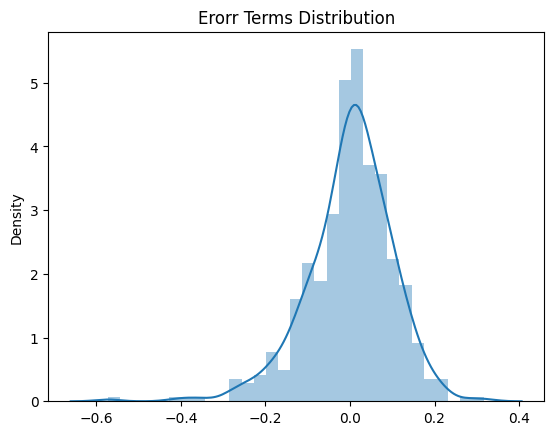

In [68]:
res = y_train-y_train_pred
sns.distplot(res)
plt.title("Erorr Terms Distribution")
plt.show()

Error terms are normally distributed with peek/mean at 0. 

c:\Users\Prajwel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


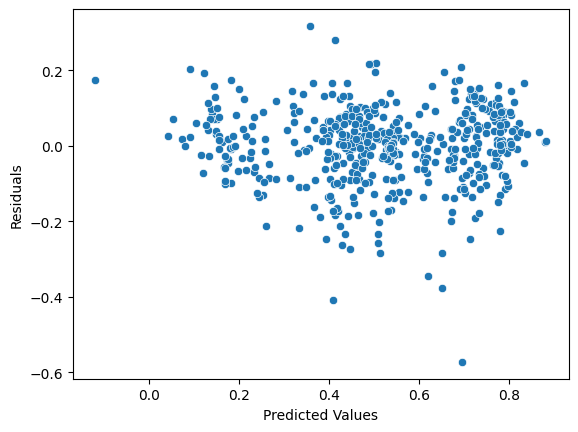

In [69]:
#Error Terms and y_train set scatter plot
sns.scatterplot(y_train_pred,res)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

There seems to be no pattern observed with respect to Predicted Values and Error Terms/Residuals

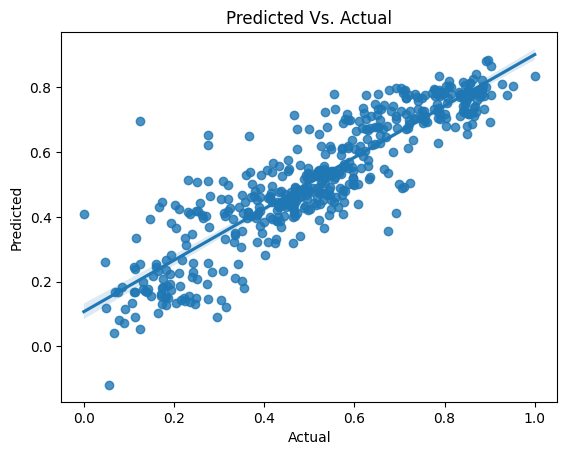

In [70]:
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Vs. Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

There is approximate constant variance with respect to error terms

### Predictions and Evaluations on Test Data Set

- Rescale test DS
- Fit  train ds
- Transform test ds

In [71]:
#Create a a list of num variables
# from sklearn.preprocessing import MinMaxScaler


# scaler = MinMaxScaler()
num_vars = ['temp','hum','windspeed','cnt']
# Fit on data - test data set should only be transformed and fit should be done only on training data set
data_test[num_vars] = scaler.transform(data_test[num_vars])
data_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain/Thunderstorm,Misty
585,1,0,1,0.868126,0.476238,0.386691,0.835711,0,0,0,...,0,0,0,0,0,1,0,0,0,0
717,1,0,1,0.340632,0.483721,0.467646,0.603428,0,0,1,...,0,0,0,0,0,0,0,1,0,0
294,0,0,0,0.452776,0.489332,0.203239,0.493097,0,0,1,...,1,0,0,1,0,0,0,0,0,0
157,0,0,1,0.807900,0.442568,0.478392,0.553497,0,1,0,...,0,0,0,0,0,0,1,0,0,0
627,1,0,1,0.607495,0.473120,0.276987,0.885642,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [72]:
data_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain/Thunderstorm,Misty
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,...,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,0.481308,0.028037,0.658879,0.559091,0.478490,0.476811,0.519810,0.233645,0.289720,0.233645,...,0.088785,0.098131,0.163551,0.172897,0.140187,0.135514,0.163551,0.107477,0.028037,0.271028
std,0.500822,0.165467,0.475198,0.226149,0.214382,0.191997,0.218586,0.424141,0.454696,0.424141,...,0.285100,0.298189,0.370735,0.379045,0.347995,0.343074,0.370735,0.310444,0.165467,0.445533
min,0.000000,0.000000,0.000000,0.046591,-0.071841,0.057588,0.088932,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.360271,0.307784,0.333635,0.373850,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.578939,0.476550,0.470283,0.511447,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.743261,0.637107,0.586318,0.672572,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.003117,0.992781,0.981707,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
X_test = data_test
y_test = data_test.pop('cnt')

In [74]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain/Thunderstorm,Misty
585,1.0,1,0,1,0.868126,0.476238,0.386691,0,0,0,...,0,0,0,0,0,1,0,0,0,0
717,1.0,1,0,1,0.340632,0.483721,0.467646,0,0,1,...,0,0,0,0,0,0,0,1,0,0
294,1.0,0,0,0,0.452776,0.489332,0.203239,0,0,1,...,1,0,0,1,0,0,0,0,0,0
157,1.0,0,0,1,0.807900,0.442568,0.478392,0,1,0,...,0,0,0,0,0,0,1,0,0,0
627,1.0,1,0,1,0.607495,0.473120,0.276987,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [75]:
#Dropping columns that were dropped in train set
X_test_sm = X_test_sm.drop(['summer','Nov','Wednesday','Thursday','Feb','Jul','Dec','Jan','holiday','Sunday','Tuesday','Monday','Jun','Aug','hum','temp','Mar','May'],axis=1)
X_test_sm.head()

,const,yr,workingday,windspeed,spring,winter,Oct,Sep,Saturday,Light Rain/Thunderstorm,Misty
585,1.0,1,1,0.386691,0,0,0,0,0,0,0
717,1.0,1,1,0.467646,0,1,0,0,0,0,0
294,1.0,0,0,0.203239,0,1,1,0,1,0,0
157,1.0,0,1,0.478392,0,0,0,0,0,0,0
627,1.0,1,1,0.276987,0,0,0,1,0,0,0


In [76]:
#Predict 
y_test_pred = lr_model.predict(X_test_sm)

#### Final Evaluation

Text(0, 0.5, 'Predictions')

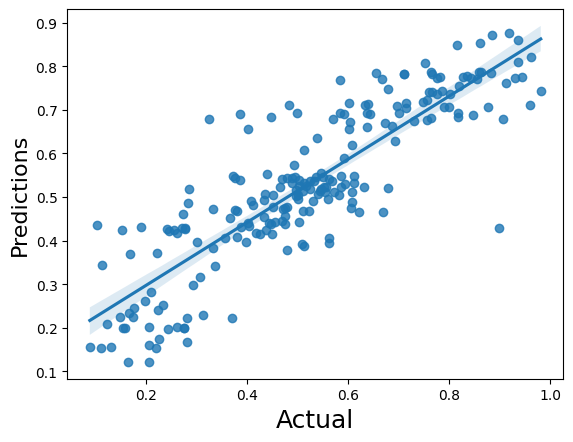

In [77]:
sns.regplot(x=y_test,y=y_test_pred)          # Plot heading 
plt.xlabel('Actual', fontsize=18)                          # X-label
plt.ylabel('Predictions', fontsize=16) 

In [78]:
#evaluate
from sklearn.metrics import r2_score
r2_score(y_true=y_test,y_pred=y_test_pred)

0.7443941679800086

Observation : Our model has predicted an R^2 value of 79 and the test set has predicted the value of 74 and the above graph also shows that the model explains the changes in demand.

### Conclusion

- We initially considered all the variables and eliminated one by one by OLS method with the following rules : 
    - High p-value and high VIF - remove the variable
    - High p-value and low VIF - remove next
    - Low p-value and high VIF - remove after the 1st 2 steps
    - Low p-value and low VIF - Keep the variables
    
- After following the above steps of elimination our model gave us an R-Square value of 79 percent.

- Variables Significance
    - cnt = 0.5128 + (0.2456)yr + (0.0630)workingday + (-0.1116)windspeed +(-0.2866)spring+(-0.0966)winter+(0.1130)Oct+(0.0812)Sep+(0.0670)Saturday+(-0.3205)Light Rain/Thunderstorm+(-0.0806)Misty
    - considering variables 'temp','hum','windspeed' and 'cnt' are normalized using min-max scaler b/w the values 0-1.

- The test set has retured a value of 74% which is near to the predicted 79%.
	